In [1]:
import pickle
import numpy as np
import pandas as pd

In [16]:
with open('evaluation_measurement2.pickle', 'rb') as fp:
    evaluation_measurement = pickle.load(fp)

In [17]:
weights = 0
for weight in evaluation_measurement['weight']:
    weights = weights + abs(weight)
    
mean_error_weights = weights/len(evaluation_measurement['weight'])
print("ERROR MEDIO PARA PESO: ", mean_error_weights)

ERROR MEDIO PARA PESO:  21.117066664914


In [18]:
heights = 0
for height in evaluation_measurement['height']:
    heights = heights + abs(height)
    
mean_error_heights = heights/len(evaluation_measurement['height'])
print("ERROR MEDIO PARA ALTURA (cm): ", mean_error_heights*100)

ERROR MEDIO PARA ALTURA (cm):  6.524115755627011


In [19]:
chests = 0
for chest in evaluation_measurement['chest']:
    chests = chests + abs(chest)
    
mean_error_chests = chests/len(evaluation_measurement['chest'])
print("ERROR MEDIO PARA PECHO (cm): ", mean_error_chests*100)

ERROR MEDIO PARA PECHO (cm):  11.975528093832533


In [20]:
hips = 0
for hip in evaluation_measurement['hip']:
    hips = hips + abs(hip)
    
mean_error_hips = hips/len(evaluation_measurement['hip'])
print("ERROR MEDIO PARA CADERA (cm): ", mean_error_hips*100)

ERROR MEDIO PARA CADERA (cm):  13.212565294098763


In [21]:
new_eva = np.array(evaluation_measurement['pve_neutral'])
df = pd.DataFrame(new_eva)
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 
print('PVE-T-SC: ', total_eval)

PVE-T-SC:  0.014560758049365982


## 0. Analizar Configuraciones

### 0.1 Parámetros promedio de SMPL

In [3]:
smpl_mean_params = np.load('additional/neutral_smpl_mean_params_6dpose.npz')

In [5]:
len(smpl_mean_params)

3

In [7]:
smpl_mean_params['cam']

array([0.9, 0. , 0. ], dtype=float32)

In [8]:
smpl_mean_params['shape']

array([ 0.20560974,  0.33556297, -0.35068282,  0.35612896,  0.41754073,
        0.03088791,  0.30475676,  0.23613405,  0.20912662,  0.31212646],
      dtype=float32)

In [9]:
smpl_mean_params['pose']

array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00, -1.00000048e+00,
        0.00000000e+00,  1.50995817e-07,  9.95594144e-01, -9.35074911e-02,
        8.96214917e-02,  9.70808983e-01, -2.75727212e-02, -2.20876053e-01,
        9.95853722e-01,  8.32496583e-02, -7.22568333e-02,  9.68795717e-01,
        5.52654527e-02, -2.33461723e-01,  9.99805868e-01, -1.16801877e-02,
        1.55893452e-02,  9.61456239e-01, -1.20510980e-02,  2.74709910e-01,
        9.93516386e-01,  7.95017406e-02, -1.06274955e-01,  9.03366446e-01,
        4.03832123e-02,  4.21436191e-01,  9.98174787e-01, -5.75351082e-02,
        5.92384301e-02,  8.73740733e-01,  1.17418924e-02,  4.82977092e-01,
        9.99480844e-01, -6.16004784e-03,  5.43189887e-03,  9.99719322e-01,
        3.17586996e-02,  2.28755195e-02,  9.89863694e-01,  5.47103174e-02,
       -5.37955277e-02,  9.98496652e-01, -1.31437480e-01,  3.35601554e-03,
        9.75578487e-01, -1.29129276e-01,  1.39408067e-01,  9.89138842e-01,
        1.69740841e-01, -

In [22]:
smpl_mean_params['pose'].shape

(144,)

### 0.2 Variado

In [58]:
from PIL import Image
from matplotlib import pyplot

In [65]:
with open('input_test.pickle', 'rb') as fp:
    input_test = pickle.load(fp)

In [66]:
input_test.shape

torch.Size([32, 256, 256])

In [68]:
input_test[0]

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]], device='cuda:0')

In [52]:
input_test[0][0].shape

torch.Size([256, 256])

In [56]:
image2 = Image.fromarray(input_test[0][0].cpu().detach().numpy())

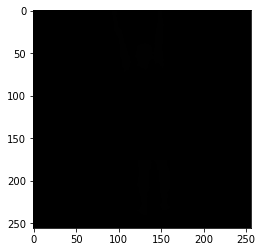

In [59]:
pyplot.imshow(image2)
pyplot.show()

## 1. Analizar Datos de Entrenamiento y Evaluación

In [38]:
from data.synthetic_training_dataset import SyntheticTrainingDataset

### 1.1 Datos de Entrenamiento

In [39]:
train_path = './data/amass_up3d_3dpw_train.npz'

train_dataset = SyntheticTrainingDataset(npz_path=train_path, params_from='all')

In [40]:
len(train_dataset)

347962

In [41]:
train_dataset[0]

{'pose': tensor([-2.7344e+01, -1.4954e+00, -5.0242e+00, -3.0735e-01,  6.2436e-02,
          3.1503e-01, -4.8097e-01, -1.3984e-02, -3.1270e-01,  2.9813e-01,
         -2.3007e-02,  1.4938e-02,  8.7894e-01, -1.3737e-01, -1.3880e-01,
          5.9682e-01,  1.2568e-01,  5.7579e-02,  3.2384e-02, -3.5846e-02,
          5.3690e-02, -2.1110e-01,  9.6816e-02, -1.3598e-01, -8.3156e-02,
         -1.7998e-01,  2.9774e-01,  1.3692e-02, -4.3456e-02,  2.4490e-02,
         -2.3649e-01,  2.4035e-01,  2.7845e-01, -1.3573e-01,  9.9988e-02,
         -4.1959e-01, -1.2317e-01,  1.1310e-02,  1.0158e-01,  7.8374e-03,
         -1.5371e-01, -2.3754e-01, -1.0029e-01,  2.0720e-01,  2.0847e-01,
          1.3823e-01, -1.1027e-01, -7.6759e-04,  3.6322e-02, -2.8740e-01,
         -5.9660e-01,  5.3885e-02,  3.8864e-01,  5.4329e-01,  2.4638e-01,
         -1.2175e+00,  2.4618e-01, -3.7457e-03,  1.5001e+00, -4.1864e-01,
          2.5386e-02, -1.0759e-01,  1.1754e-01,  2.8639e-02,  1.1327e-01,
         -1.4226e-01, -2.0009e

In [42]:
train_dataset[0]['pose'].shape

torch.Size([72])

In [43]:
train_dataset[0]['shape'].shape

torch.Size([10])

In [47]:
train_dataset[0]['pose']

tensor([-2.7344e+01, -1.4954e+00, -5.0242e+00, -3.0735e-01,  6.2436e-02,
         3.1503e-01, -4.8097e-01, -1.3984e-02, -3.1270e-01,  2.9813e-01,
        -2.3007e-02,  1.4938e-02,  8.7894e-01, -1.3737e-01, -1.3880e-01,
         5.9682e-01,  1.2568e-01,  5.7579e-02,  3.2384e-02, -3.5846e-02,
         5.3690e-02, -2.1110e-01,  9.6816e-02, -1.3598e-01, -8.3156e-02,
        -1.7998e-01,  2.9774e-01,  1.3692e-02, -4.3456e-02,  2.4490e-02,
        -2.3649e-01,  2.4035e-01,  2.7845e-01, -1.3573e-01,  9.9988e-02,
        -4.1959e-01, -1.2317e-01,  1.1310e-02,  1.0158e-01,  7.8374e-03,
        -1.5371e-01, -2.3754e-01, -1.0029e-01,  2.0720e-01,  2.0847e-01,
         1.3823e-01, -1.1027e-01, -7.6759e-04,  3.6322e-02, -2.8740e-01,
        -5.9660e-01,  5.3885e-02,  3.8864e-01,  5.4329e-01,  2.4638e-01,
        -1.2175e+00,  2.4618e-01, -3.7457e-03,  1.5001e+00, -4.1864e-01,
         2.5386e-02, -1.0759e-01,  1.1754e-01,  2.8639e-02,  1.1327e-01,
        -1.4226e-01, -2.0009e-01, -4.9888e-02, -2.4

In [45]:
train_dataset[0]['pose'][3:]

tensor([-3.0735e-01,  6.2436e-02,  3.1503e-01, -4.8097e-01, -1.3984e-02,
        -3.1270e-01,  2.9813e-01, -2.3007e-02,  1.4938e-02,  8.7894e-01,
        -1.3737e-01, -1.3880e-01,  5.9682e-01,  1.2568e-01,  5.7579e-02,
         3.2384e-02, -3.5846e-02,  5.3690e-02, -2.1110e-01,  9.6816e-02,
        -1.3598e-01, -8.3156e-02, -1.7998e-01,  2.9774e-01,  1.3692e-02,
        -4.3456e-02,  2.4490e-02, -2.3649e-01,  2.4035e-01,  2.7845e-01,
        -1.3573e-01,  9.9988e-02, -4.1959e-01, -1.2317e-01,  1.1310e-02,
         1.0158e-01,  7.8374e-03, -1.5371e-01, -2.3754e-01, -1.0029e-01,
         2.0720e-01,  2.0847e-01,  1.3823e-01, -1.1027e-01, -7.6759e-04,
         3.6322e-02, -2.8740e-01, -5.9660e-01,  5.3885e-02,  3.8864e-01,
         5.4329e-01,  2.4638e-01, -1.2175e+00,  2.4618e-01, -3.7457e-03,
         1.5001e+00, -4.1864e-01,  2.5386e-02, -1.0759e-01,  1.1754e-01,
         2.8639e-02,  1.1327e-01, -1.4226e-01, -2.0009e-01, -4.9888e-02,
        -2.4284e-01, -1.5929e-01,  1.2921e-01,  2.2

In [46]:
train_dataset[0]['pose'][:3]

tensor([-27.3444,  -1.4954,  -5.0242])

### 1.2 Datos de Evaluación

In [59]:
val_path = 'data/up3d_3dpw_val.npz'

val_dataset = SyntheticTrainingDataset(npz_path=val_path, params_from='all')

In [60]:
len(val_dataset)

11836

In [61]:
val_dataset[0]

{'pose': tensor([-2.7808e+01,  4.4019e-01, -4.4615e+00, -1.1451e-01, -3.1743e-02,
          5.8566e-02, -3.5597e-01, -7.7979e-03, -5.5962e-02,  2.0834e-01,
         -2.6680e-02, -5.1161e-03,  6.9643e-01, -1.3414e-01, -9.9954e-02,
          6.6915e-01, -5.3203e-02,  7.7806e-02,  1.8558e-02,  6.8516e-03,
          3.0969e-03, -8.0196e-02,  3.9522e-02, -3.1556e-02, -9.6071e-02,
         -1.8827e-01,  2.0305e-01,  2.9115e-02, -3.9537e-02, -1.3958e-02,
         -3.4169e-01,  2.7468e-01,  1.2448e-01, -1.2524e-01,  1.3106e-01,
         -3.6924e-01, -1.7380e-01, -2.0098e-02,  6.3947e-02,  1.9406e-02,
          1.4228e-02, -3.4996e-01, -8.6720e-02,  7.1075e-02,  3.0278e-01,
          1.7379e-01, -9.2989e-02, -4.4066e-02,  1.0234e-01, -3.2872e-01,
         -9.3252e-01,  2.0622e-01,  2.8756e-01,  8.7007e-01,  2.8338e-01,
         -1.8472e+00,  6.2886e-01,  4.2728e-02,  1.9275e+00, -7.2214e-01,
         -1.7678e-01, -1.2305e-01,  2.1278e-01, -1.1537e-02,  1.7261e-01,
         -2.2975e-01, -8.9399e

In [62]:
val_dataset[0]['pose'].shape

torch.Size([72])

In [63]:
val_dataset[0]['shape'].shape

torch.Size([10])

## 2. STARPS evaluación con SSP-3D

### 2.1 Pesos Base

In [33]:
with open('evaluation.json', 'rb') as fp:
    evaluation_file = pickle.load(fp)

In [34]:
new_eva = np.array(evaluation_file['data'])
df = pd.DataFrame(new_eva)

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889
0,0.020383,0.020410,0.020402,0.020369,0.020420,0.020439,0.020399,0.020391,0.021003,0.021316,...,0.019607,0.019691,0.019670,0.019600,0.019521,0.019476,0.019584,0.019517,0.019553,0.019618
1,0.008856,0.008768,0.008659,0.008701,0.008607,0.008679,0.008531,0.008569,0.008748,0.008707,...,0.007965,0.007955,0.007895,0.007836,0.007781,0.007751,0.007875,0.007863,0.007897,0.007920
2,0.009039,0.008790,0.008505,0.008755,0.008440,0.008745,0.008202,0.008481,0.006951,0.006811,...,0.012421,0.012365,0.012380,0.012461,0.012548,0.012612,0.012517,0.012552,0.012504,0.012486
3,0.016012,0.015549,0.015158,0.015462,0.014874,0.015148,0.014695,0.014885,0.013101,0.012647,...,0.014731,0.014595,0.014430,0.014321,0.014244,0.014208,0.014494,0.014542,0.014597,0.014604
4,0.007808,0.007721,0.007341,0.007425,0.007435,0.007832,0.006873,0.006998,0.006083,0.005536,...,0.007281,0.007177,0.007098,0.007098,0.007133,0.007165,0.007192,0.007233,0.007238,0.007229


In [36]:
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 
print('PVE-T-SC: ', total_eval)

PVE-T-SC:  0.015256683442117147


### 2.2 Épocas de entrenamiento = 1

In [29]:
with open('evaluation.pickle', 'rb') as fp:
    evaluation_file = pickle.load(fp)

In [30]:
new_eva = np.array(evaluation_file['data'])
df = pd.DataFrame(new_eva)

In [32]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889
0,0.007626,0.007655,0.007863,0.007936,0.007817,0.007753,0.008126,0.008287,0.009176,0.009487,...,0.008354,0.008447,0.008549,0.008630,0.008686,0.008742,0.008556,0.008546,0.008494,0.008486
1,0.008384,0.008423,0.008547,0.008557,0.008529,0.008477,0.008714,0.008772,0.009498,0.009718,...,0.008432,0.008511,0.008552,0.008567,0.008565,0.008576,0.008518,0.008485,0.008474,0.008497
2,0.006936,0.007134,0.007043,0.006860,0.007263,0.007340,0.006941,0.006802,0.007356,0.007189,...,0.005531,0.005551,0.005482,0.005411,0.005356,0.005313,0.005422,0.005367,0.005416,0.005472
3,0.012772,0.012865,0.012674,0.012564,0.012836,0.012977,0.012444,0.012372,0.012960,0.012838,...,0.011438,0.011465,0.011352,0.011236,0.011137,0.011070,0.011273,0.011208,0.011279,0.011355
4,0.011658,0.011661,0.011637,0.011652,0.011605,0.011682,0.011635,0.011692,0.012129,0.012311,...,0.011015,0.011063,0.011069,0.011050,0.011015,0.011005,0.011033,0.011004,0.011014,0.011038


In [31]:
means = df.mean(axis = 0)
total_eval = sum(means) / len(means) 
print('PVE-T-SC: ', total_eval)

PVE-T-SC:  0.010000903993447585
